<a href="https://colab.research.google.com/github/ajinkyajumde/CREDIT-CARD/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Almabetter projects/credit card/default of credit card clients.csv'

# **DATA INSPECTION**

In [4]:
df=pd.read_csv(path)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

# **DATA ANALYSIS**

In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

# **BASED ON CATEGORICAL FEATURES**

BASED ON GENDER

In [11]:
plot=df.groupby(['SEX','default payment next month']).size().unstack()
plot

default payment next month,0,1
SEX,,
1,9015,2873
2,14349,3763


In [12]:
df['gender']=df.apply((lambda x: 'Male' if x['SEX']==1 else 'Female'),axis=1)

In [13]:
plot=df.groupby(['gender','default payment next month']).size().unstack()
plot

default payment next month,0,1
gender,,
Female,14349,3763
Male,9015,2873


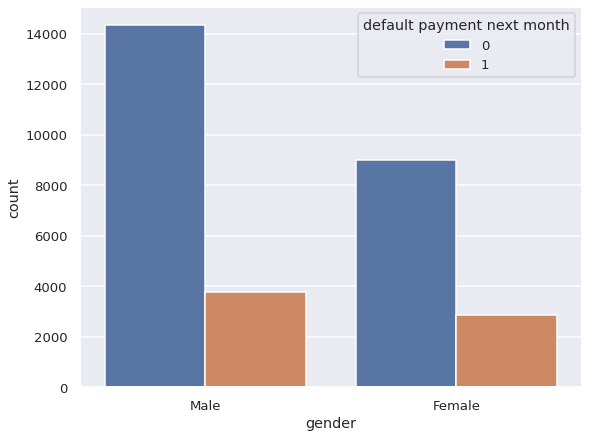

In [14]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

gender = sns.countplot(x='gender', hue='default payment next month', data=df)
gender.set_xticklabels(['Male','Female'])
plt.show()

In [15]:
df=df.drop(columns=['SEX'])

BASED ON EDUCATION

In [16]:
plot=df.groupby(['EDUCATION','default payment next month']).size().unstack()
plot

default payment next month,0,1
EDUCATION,,
0,14.0,NaN
1,8549.0,2036.0
2,10700.0,3330.0
3,3680.0,1237.0
4,116.0,7.0
5,262.0,18.0
6,43.0,8.0


In [17]:
df['education']=df.apply((lambda x : 0 if x['EDUCATION']==0 or x['EDUCATION']==4 or x['EDUCATION']==5 or x['EDUCATION']==6 else x['EDUCATION'] ),axis=1)

In [18]:
df=df.drop(columns=['EDUCATION'])

In [19]:
plot=df.groupby(['education','default payment next month']).size().unstack()
plot

default payment next month,0,1
education,,
0,435,33
1,8549,2036
2,10700,3330
3,3680,1237


In [20]:
labels=['others', 'graduate', 'school','university', 'high school']

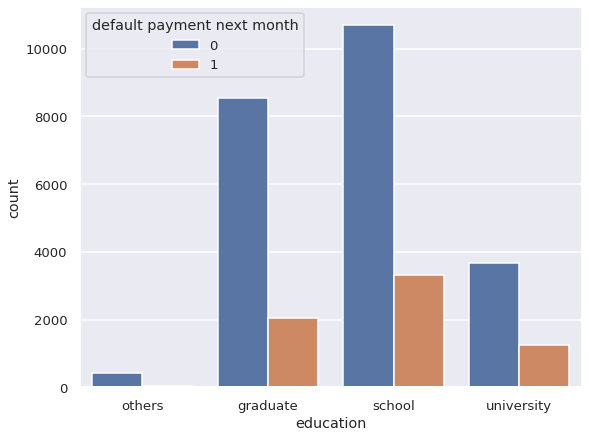

In [21]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

ax = sns.countplot(x='education', hue='default payment next month', data=df)
ax.set_xticklabels(labels)

plt.show()

BASED ON MARITAL STATUS

In [22]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [23]:
df['marriage']=df.apply((lambda x: 'Married' if x['MARRIAGE']==1 else 'single' if x['MARRIAGE']==2 else 'others' ),axis=1)

In [24]:
df=df.drop(columns=['MARRIAGE'])

In [25]:
plot=df.groupby(['marriage','default payment next month']).size().unstack()
plot

default payment next month,0,1
marriage,,
Married,10453,3206
others,288,89
single,12623,3341


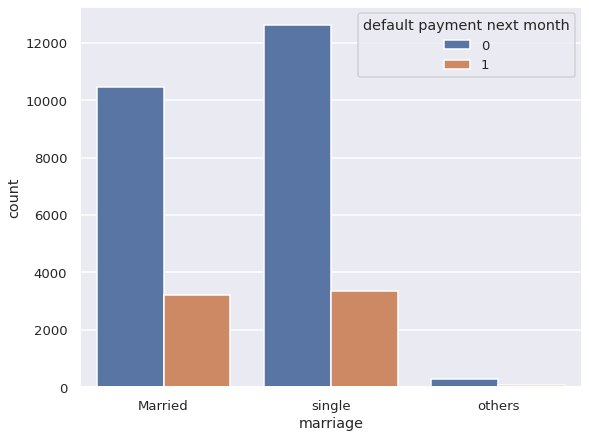

In [26]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

ax = sns.countplot(x='marriage', hue='default payment next month', data=df)


plt.show()

BASED ON AGE

In [27]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [28]:
c=min(df['AGE'])
d=max(df['AGE'])

In [29]:

print(f'THE MINIMUM AGE IS {c}')
print(f'THE MAXIMUM AGE IS {d}')


THE MINIMUM AGE IS 21
THE MAXIMUM AGE IS 79


In [30]:
df['generation']=df.apply((lambda x : 'X' if x['AGE'] > 40 and x['AGE'] <57 else 'Y' if x['AGE'] < 41 and x['AGE'] >24 else 'Z' if x['AGE'] < 25 and x['AGE'] >20 else 'BABY BOOMER'  ),axis=1)

In [31]:
df=df.drop(columns=['AGE'])

In [32]:
df['generation'].value_counts()

Y              19041
X               7608
Z               2685
BABY BOOMER      666
Name: generation, dtype: int64

In [33]:
plot=df.groupby(['generation','default payment next month']).size().unstack()
plot

default payment next month,0,1
generation,,
BABY BOOMER,491,175
X,5807,1801
Y,15111,3930
Z,1955,730


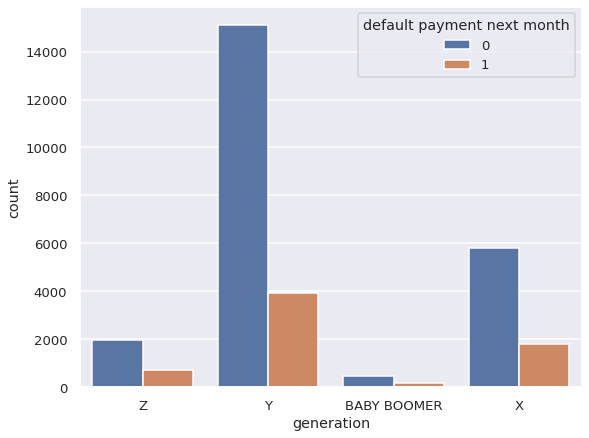

In [34]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

ax = sns.countplot(x='generation', hue='default payment next month', data=df)


plt.show()

BASED ON REPAYMENTS

In [35]:
L=['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [36]:
df['score']=df['PAY_0']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']

In [37]:
df['score']=df['score']*2

In [38]:
df['score'].value_counts()

 0     10192
-12     2496
-24     2109
 4      1883
-2      1338
-8      1163
-4      1084
-6      1061
-10     1061
-18      867
 8       717
 6       653
-14      626
 24      601
 12      550
-16      489
 16      487
 10      399
 14      343
 22      323
 2       298
-20      293
 18      186
 20      161
 26      145
-22       88
 28       79
 30       55
 32       48
 56       27
 40       26
 34       25
 36       22
 64       20
 66       19
 54       12
 38       11
 42       10
 44        9
 62        9
 48        6
 50        3
 46        2
 72        1
 60        1
 58        1
 52        1
Name: score, dtype: int64

In [39]:
df['rating']=100-df['score']

In [40]:
df=df.drop(columns=L)
df=df.drop(columns=['score'])
df.head()

,ID,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,gender,education,marriage,generation,rating
0,1,20000,3913,3102,689,0,0,0,0,689,0,0,0,0,1,Female,2,Married,Z,104
1,2,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,Female,2,single,Y,94
2,3,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,Female,2,single,Y,100
3,4,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,Female,2,Married,Y,100
4,5,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,Male,2,Married,BABY BOOMER,104


In [41]:
df['total_bill']=df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']

In [42]:
df=df.drop(columns=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'])

In [43]:
df.head()

,ID,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,gender,education,marriage,generation,rating,total_bill
0,1,20000,0,689,0,0,0,0,1,Female,2,Married,Z,104,7704
1,2,120000,0,1000,1000,1000,0,2000,1,Female,2,single,Y,94,17077
2,3,90000,1518,1500,1000,1000,1000,5000,0,Female,2,single,Y,100,101653
3,4,50000,2000,2019,1200,1100,1069,1000,0,Female,2,Married,Y,100,231334
4,5,50000,2000,36681,10000,9000,689,679,0,Male,2,Married,BABY BOOMER,104,109339


In [44]:
df['total_payment']=df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']

In [45]:
df=df.drop(columns=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','ID'])

In [46]:
df.head()

,LIMIT_BAL,default payment next month,gender,education,marriage,generation,rating,total_bill,total_payment
0,20000,1,Female,2,Married,Z,104,7704,689
1,120000,1,Female,2,single,Y,94,17077,5000
2,90000,0,Female,2,single,Y,100,101653,11018
3,50000,0,Female,2,Married,Y,100,231334,8388
4,50000,0,Male,2,Married,BABY BOOMER,104,109339,59049


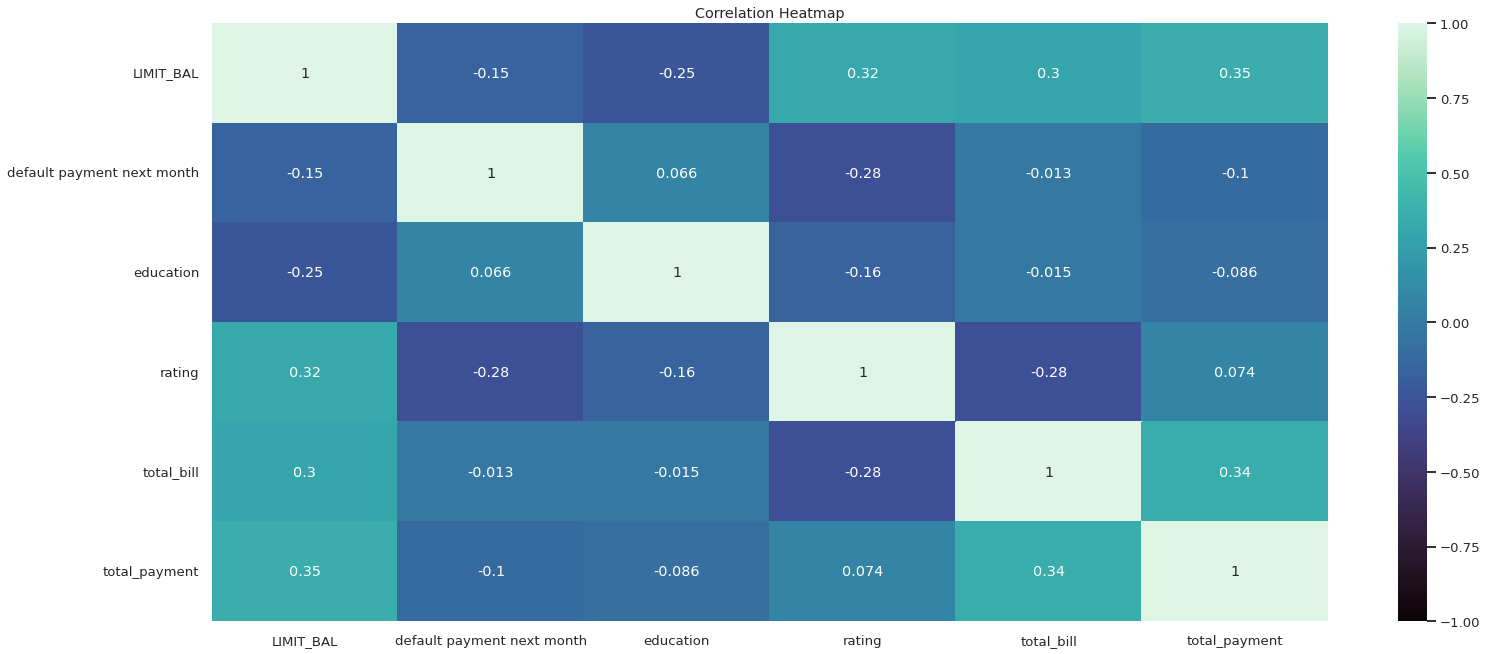

In [47]:
corr = df.corr()
plt.figure(figsize=(25, 11))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

In [48]:
df.columns

Index(['LIMIT_BAL', 'default payment next month', 'gender', 'education',
       'marriage', 'generation', 'rating', 'total_bill', 'total_payment'],
      dtype='object')

In [49]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

In [50]:
min(df['LIMIT_BAL'])

10000

In [51]:
max(df['LIMIT_BAL'])

1000000

In [52]:
np.median(list(df['LIMIT_BAL']))

140000.0

In [53]:
df['category']=df.apply((lambda x : 'silver_card' if x['LIMIT_BAL'] < 50000 else 'gold_card' if x['LIMIT_BAL'] >=50000 and x['LIMIT_BAL'] < 100000  else 'platinum' if x['LIMIT_BAL'] >=100000 and x['LIMIT_BAL'] < 500000 else 'diamond'  ),axis=1)

In [54]:
df['category'].value_counts()

platinum       17622
gold_card       7139
silver_card     4311
diamond          928
Name: category, dtype: int64

In [55]:
df=df.drop(columns=['LIMIT_BAL'])

In [56]:
df=pd.get_dummies(df, columns=['gender', 'education','marriage', 'generation','category'], prefix=['gender', 'education','marriage', 'generation','category'])

In [57]:
#  # Data for all the independent variables
X = df.drop(labels='default payment next month',axis=1)

#  # Data for the dependent variable
Y = df['default payment next month']

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [59]:
# # Scale X with a standard scaler
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [60]:
X['const']=1

In [61]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=1)

In [62]:
from imblearn.over_sampling import ADASYN

In [63]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X_train, Y_train)

In [64]:
X_train, Y_train=X_resampled, y_resampled

In [65]:
Y_train.value_counts()

0    16364
1    16166
Name: default payment next month, dtype: int64

In [66]:
models = {
    LogisticRegression():       "     Logistic Regression",
    SVC():                      "  Support Vector Machine",
    RandomForestClassifier():   "Random Forest Classifier",
    XGBClassifier():            "     XG Boost Classifier"
  
}

for model in models.keys():
    model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [67]:
for model, name in models.items():
    print(name + ": {:.2f}%".format(model.score(X_train, Y_train) * 100))

     Logistic Regression: 61.75%
  Support Vector Machine: 61.54%
Random Forest Classifier: 99.32%
     XG Boost Classifier: 71.83%


In [68]:
for model, name in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, Y_test) * 100))

     Logistic Regression: 64.72%
  Support Vector Machine: 68.10%
Random Forest Classifier: 70.51%
     XG Boost Classifier: 74.23%


## **LOGISTIC REGRESSION MODEL WITH K FOLD CROSS VALIDATION**

In [69]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [70]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.001,0.05,0.01, 0.1, 1, 10, 100]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.05, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [71]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.665205758230862 at C = 100


In [72]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=1)

In [73]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [74]:
# Predictions on the train set
Y_train_pred = logistic_imb_model.predict(X_train)

In [75]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [76]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train, Y_train_pred)
print(confusion)

[[10567  5797]
 [ 6646  9520]]


In [77]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [78]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_train, Y_train_pred))

Accuracy:- 0.6174915462649861
Sensitivity:- 0.5888902635160213
Specificity:- 0.6457467611830848
F1-Score:- 0.6047708287012038


In [79]:
# Predictions on the train set
Y_test_pred = logistic_imb_model.predict(X_test)

In [80]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

[[4559 2441]
 [ 734 1266]]


In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, Y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_test, Y_test_pred))

Accuracy:- 0.6472222222222223
Sensitivity:- 0.633
Specificity:- 0.6512857142857142
F1-Score:- 0.4436656737340109


# **RANDOM FOREST REGRESSION**

In [83]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [84]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
)

# Fit the model
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 10, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]})

In [85]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6714417460805411 using {'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [86]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             
                             n_estimators=100)

In [87]:
# Fit the model
rfc_imb_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)

In [88]:
# Predictions on the train set
Y_train_pred = rfc_imb_model.predict(X_train)

In [89]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train, Y_train_pred)
print(confusion)

[[12508  3856]
 [ 6719  9447]]


In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_train, Y_train_pred))

Accuracy:- 0.6749154626498617
Sensitivity:- 0.5843746133861191
Specificity:- 0.7643607919824004
F1-Score:- 0.6411483253588517


In [92]:
# Predictions on the train set
Y_test_pred = rfc_imb_model.predict(X_test)

In [93]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

[[5365 1635]
 [ 743 1257]]


In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, Y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_test, Y_test_pred))

Accuracy:- 0.7357777777777778
Sensitivity:- 0.6285
Specificity:- 0.7664285714285715
F1-Score:- 0.5139002452984464
